# Постановка задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Импорт необходимых библиотек

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import plotly.express as px
from IPython.display import display #импортируем функцию display для лучшего вывода таблиц
import pandas as pd 
import numpy as np
import importlib #реализация оператора импорта Python
from collections import Counter

#Библиотека sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle #метод shuffle для перемешивания данных
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix

#установка библиотеки imbalanced-learn
#conda install -c conda-forge imbalanced-learn
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Модели библиотеки LGBM
from lightgbm import LGBMClassifier

#Модели библиотеки Catboost
#pip install catboost
from catboost import CatBoostClassifier

#Библиотека scipy
from scipy import stats as st 

#keras, tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback, EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
pd.options.display.float_format = '{:,.3f}'.format #хочу, чтобы данные типа float записывались с сепаратором и округлялись
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 500)

In [3]:
verbose = True

In [4]:
try:
    contract = pd.read_csv(r'D:\Final Project\data\contract.csv', sep = ',')
    internet = pd.read_csv(r'D:\Final Project\data\internet.csv', sep = ',')
    personal = pd.read_csv(r'D:\Final Project\data\personal.csv', sep = ',')
    phone = pd.read_csv(r'D:\Final Project\data\phone.csv', sep = ',')
except: 
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [5]:
all_datasets = [contract, internet, personal, phone]
for dataset in all_datasets:
    display(dataset.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.650,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.750,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.800,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.150,3487.95


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [6]:
all_datasets = [contract, internet, personal, phone]
for dataset in all_datasets:
    print(f'Длина датасета: {len(dataset)}')

Длина датасета: 7043
Длина датасета: 5517
Длина датасета: 7043
Длина датасета: 6361


**Можно сделать следующий вывод. Во всех датафреймах присутсвует столбец customerID. Данный столбец является ключем ко всем таблицам. Будем мерджить по столбцу customerID. Далее после того, как у мы смерджим все таблицы в части значений ожидается появление значений NaN, так как датафреймы internet, phone обладают меньшей длиной, чем датафреймы contract, phone.**

In [7]:
df = contract.merge(internet, on = 'customerID', how = 'outer')
df = df.merge(personal, on = 'customerID', how = 'outer')
df = df.merge(phone, on = 'customerID', how = 'outer')

In [8]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.800,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.200,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.600,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.400,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


In [9]:
df.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


# EDA

## Заполнение пропусков

In [11]:
for column in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
    print(df[column].unique())

['DSL' 'Fiber optic' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
[nan 'No' 'Yes']


**Заполним значения nan в указанных выше столбцах значением 'нет инфо'**

In [12]:
for column in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
     df.loc[df[column].isnull() == True, column] = 'нет инфо' 

In [13]:
print(f'Количество пропусков в датафрейме после заполнения пропусков: {df.isnull().sum().sum()}')

Количество пропусков в датафрейме после заполнения пропусков: 0


In [14]:
for column in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
    print(df[column].unique())

['DSL' 'Fiber optic' 'нет инфо']
['No' 'Yes' 'нет инфо']
['Yes' 'No' 'нет инфо']
['No' 'Yes' 'нет инфо']
['No' 'Yes' 'нет инфо']
['No' 'Yes' 'нет инфо']
['No' 'Yes' 'нет инфо']
['нет инфо' 'No' 'Yes']


## Работа со столбцами BeginDate, EndDate

В нашем датафрейме есть 11 записей с датой начала контракта 2020-02-01. Для данных записей сумма платежей равна ' ', то есть равна нулю в нашем датафрейме. Удалим данные записи, так как это всего лишь 11 записей из нашего датафрема и наиболее вероятно данные записи будут негативно влиять на качество нашей модели, так как сумма платежей по этим записям равна нулю.

In [15]:
df[df['BeginDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.550,,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,нет инфо
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.250,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.850,,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.750,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.050,,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,нет инфо
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.850,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.350,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.000,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.700,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.350,,DSL,No,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


In [16]:
df[df['TotalCharges'] ==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.550,,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,нет инфо
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.250,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.850,,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.750,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.050,,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,нет инфо
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.850,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.350,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.000,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.700,,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.350,,DSL,No,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


In [17]:
print(f'Количество строк до удаления: {len(df)}')

Количество строк до удаления: 7043


In [18]:
df = df.drop(df[df['BeginDate'] == '2020-02-01'].index, axis=0)

In [19]:
print(f'Количество строк после удаления: {len(df)}')

Количество строк после удаления: 7032


In [20]:
df.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,нет инфо
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  gender            7032 non-null   object 
 16  SeniorCitizen     7032 non-null   int64  


**Мы видим, что в столбце EndDate, который является нашим целевым признаком, все значения делятся на 2 категории: 1) No - что значит, что клиент работает с компанией «Ниединогоразрыва.ком» 2) - значения с датой, что значит дату окончания срока действия договора**

Произведем следующие операции:  
1) Заменим значения No на дату 2020-02-01. То есть датой, на момент которой была произведена выгрузка данных. Сохраним эти данные в новый столбец EndDate_time_and_date.   
2) Затем переведм столбцы BeginDate, EndDate_time_and_date в тип даты и времени.  
3) Далее возьмем разницу между BeginDate, EndDate_time_and_date.

In [22]:
def fillup_end_date(df):
    if df['EndDate'] == 'No':
        return '2020-02-01 00:00:00'
    else:
        return df['EndDate']

df['EndDate_time_and_date'] = df.apply(fillup_end_date, axis = 1)     

In [23]:
df.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,EndDate_time_and_date
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо,2020-02-01 00:00:00
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,2020-02-01 00:00:00
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,2019-12-01 00:00:00
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,нет инфо,2020-02-01 00:00:00
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,2019-11-01 00:00:00


In [24]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format = '%Y-%m-%d')
df['EndDate_time_and_date'] = pd.to_datetime(df['EndDate_time_and_date'], format = '%Y-%m-%d')
df['Duration'] = df['EndDate_time_and_date'] - df['BeginDate']

In [25]:
df.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,EndDate_time_and_date,Duration
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо,2020-02-01,31 days
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,2020-02-01,1036 days


In [26]:
df['Duration'] = df['Duration'].astype('timedelta64[D]')

In [27]:
df.head(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,EndDate_time_and_date,Duration
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо,2020-02-01,31.000
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,2020-02-01,"1,036.000"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customerID             7032 non-null   object        
 1   BeginDate              7032 non-null   datetime64[ns]
 2   EndDate                7032 non-null   object        
 3   Type                   7032 non-null   object        
 4   PaperlessBilling       7032 non-null   object        
 5   PaymentMethod          7032 non-null   object        
 6   MonthlyCharges         7032 non-null   float64       
 7   TotalCharges           7032 non-null   object        
 8   InternetService        7032 non-null   object        
 9   OnlineSecurity         7032 non-null   object        
 10  OnlineBackup           7032 non-null   object        
 11  DeviceProtection       7032 non-null   object        
 12  TechSupport            7032 non-null   object        
 13  Str

## Перевод столбца TotalCharges из формата object во float

In [29]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

## Кодирование целевого столбца EndDate

Закодируем целевые признаки следующим образом: значение No кодируем как ноль, значение даты кодируем как 1

In [30]:
def fillup_target(df):
    if df['EndDate'] == 'No':
        return 0
    if df['EndDate'] != 'No':
        return 1

df['EndDate'] = df.apply(fillup_target, axis = 1)      

In [31]:
df.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,EndDate_time_and_date,Duration
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.850,29.850,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо,2020-02-01,31.000
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.950,"1,889.500",DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,2020-02-01,"1,036.000"
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.850,108.150,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,2019-12-01,61.000


# Статистический анализ выручки

**На данном этапе произведем статистический анализ выручки. Проведем его сейчас, так как далее часть столбцов будет удалено из-за корреляции.**

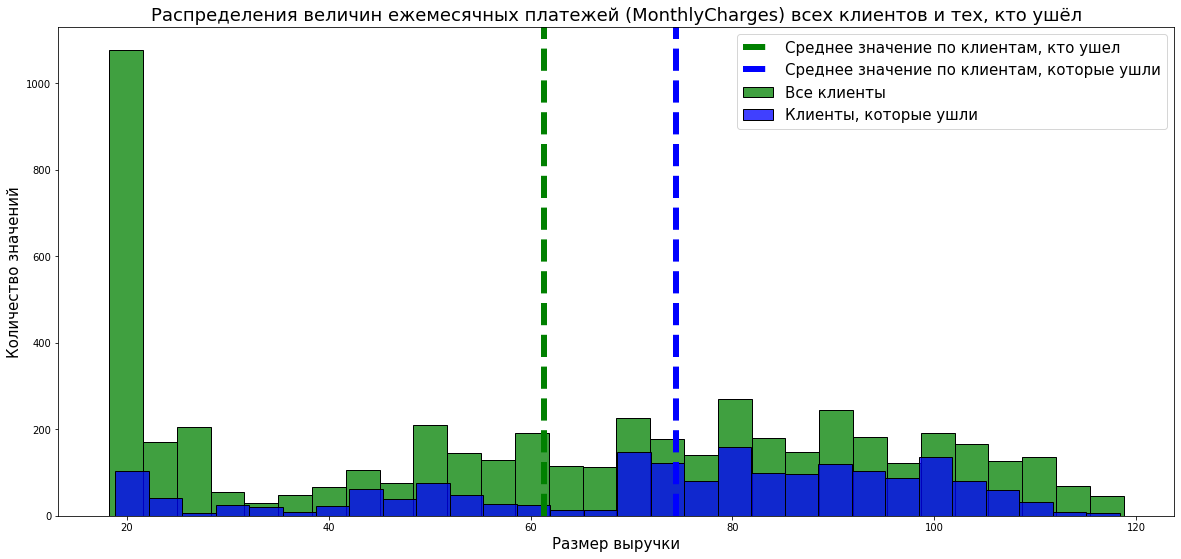

In [32]:
f, axes = plt.subplots(1, 1, figsize=(20, 9))
axes.set_title('Распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл', fontsize=18)
axes.set_ylabel('Количество значений', fontsize=15)
sns.histplot(df[df['EndDate'] == 0]['MonthlyCharges'], bins=30, color = 'green')
sns.histplot(df[df['EndDate'] == 1]['MonthlyCharges'], bins = 30, color = 'blue')
axes.set_xlabel('Размер выручки', fontsize=15)
plt.axvline(61.307, 0, color = 'green', linestyle='--', linewidth = 6)
plt.axvline(74.441, 0, color = 'blue', linestyle='--', linewidth = 6)
axes.legend(labels=["Среднее значение по клиентам, кто ушел","Среднее значение по клиентам, которые ушли", 
                    "Все клиенты","Клиенты, которые ушли"], fontsize=15);

In [33]:
df[df['EndDate'] == 1]['MonthlyCharges'].describe()

count   1,869.000
mean       74.441
std        24.666
min        18.850
25%        56.150
50%        79.650
75%        94.200
max       118.350
Name: MonthlyCharges, dtype: float64

In [34]:
#df['MonthlyCharges'].describe()
df[df['EndDate'] == 0]['MonthlyCharges'].describe()

count   5,163.000
mean       61.307
std        31.095
min        18.250
25%        25.100
50%        64.450
75%        88.475
max       118.750
Name: MonthlyCharges, dtype: float64

Выдвенем нулевую гипотезу, что среднее значение выручки по клиентам, которые ушли = средней выручке клиентов, которые остались.
Среднее значение для клиентов, которые остались = 61,308. Среднее значение для клиентов, которые ушли = 74,441.
Дургими словами мы сравниваем двк выборки из геенральной совокупности и хотим проверить гипотезу о равенстве средней выруки.

Применим метод scipy.stats.ttest_ind. В качестве аргумента equal_var выберем True, так как:  
1) Cредниквадратичные отклонения очень сильно отличаются: 24.666 против 30.086.  
2) Так как выборки взяты из одной генеральной совокупности.  

In [35]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(df[df['EndDate'] == 1]['MonthlyCharges'], 
                      df[df['EndDate'] == 0]['MonthlyCharges'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else: 
    print("Принимаем нулевую гипотезу")

p-значение: 6.760843117980302e-60
Отвергаем нулевую гипотезу


Таким образом, можно сделать вывод, что средние значению выручки по клиентам, которые остались не равно среднему значению выручки по клиентам, которые ушли. **Для бизнеса можно сделать негативный вывод, что более богатые клиенты уходят от нас.**

## Удаление столбцов

Удалим столбцы, которые не нужны в машинном обучении

In [36]:
df = df.drop(labels = ['customerID', 'BeginDate', 'EndDate_time_and_date'], axis = 1)
df.head(3)

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Duration
0,0,Month-to-month,Yes,Electronic check,29.850,29.850,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,нет инфо,31.000
1,0,One year,No,Mailed check,56.950,"1,889.500",DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,"1,036.000"
2,1,Month-to-month,Yes,Mailed check,53.850,108.150,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,61.000


In [37]:
df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [38]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

In [39]:
df.columns

Index(['EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'Duration'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndDate           7032 non-null   int64  
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  gender            7032 non-null   object 
 14  SeniorCitizen     7032 non-null   object 
 15  Partner           7032 non-null   object 
 16  Dependents        7032 non-null   object 


# Анализ признаков на корреляцию

## Анализ численных признаков на корреляцию

In [41]:
df.corr()

,EndDate,MonthlyCharges,TotalCharges,Duration
EndDate,1.000,0.193,-0.199,-0.354
MonthlyCharges,0.193,1.000,0.651,0.247
TotalCharges,-0.199,0.651,1.000,0.826
Duration,-0.354,0.247,0.826,1.000


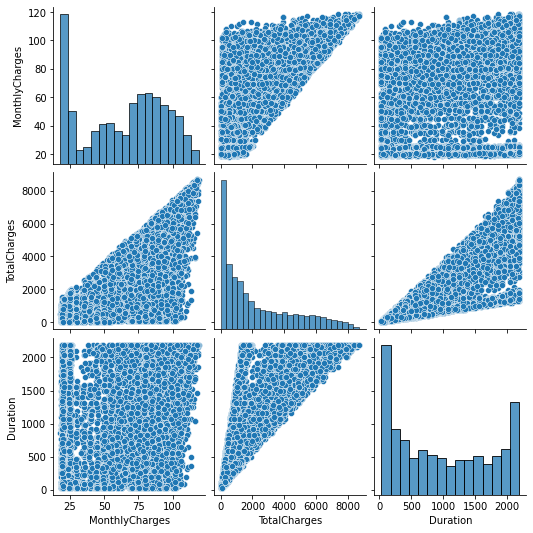

In [42]:
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'Duration']]);

**Присутствует очень сиьная корреляция между столбцами Total Charges и Monthly Charges, Duration и Total Charges. Удалим столбец Monthly Charges. Далее экспериментальным путем было получено, что без столбца MonthlyCharges метрики увеличиваются.**

In [43]:
df = df.drop(labels = ['MonthlyCharges'], axis = 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndDate           7032 non-null   int64  
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   TotalCharges      7032 non-null   float64
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  gender            7032 non-null   object 
 13  SeniorCitizen     7032 non-null   object 
 14  Partner           7032 non-null   object 
 15  Dependents        7032 non-null   object 
 16  MultipleLines     7032 non-null   object 


In [45]:
df_all = df

# ML c пайплайном

In [46]:
X = df.drop('EndDate', axis=1)
y = df['EndDate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, 
                                                       stratify = y)


print(f"Кол-во записей в обучающей выборке: {X_train.shape}")
print(f"Кол-во записей в тестовой выборке: {X_test.shape}")

Кол-во записей в обучающей выборке: (5625, 17)
Кол-во записей в тестовой выборке: (1407, 17)


Далее распишим для каждой из категорей (численные признаки или категориальные признаки) методы, которые будем применять. Методы, которые будем применять поместим в ColumnTransformer. 

In [47]:
numeric_features = ['TotalCharges', 'Duration']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

 
cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'MultipleLines']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, cat_features),
                                               ('num', numeric_transformer, numeric_features) 
                                                                                              ])

In [48]:
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'LGBMClassifier', 
         'Catboost']

classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), 
               LGBMClassifier(), CatBoostClassifier()]
    
parameters = [{'classifier__max_depth': range (1, 50, 1), 'classifier__min_samples_leaf': range(1, 9, 1), 
              'classifier__min_samples_split': range(1, 7, 1), 'classifier__class_weight': ['balanced']}, 
              
              {'classifier__n_estimators': range (10, 20, 5), 'classifier__max_depth': range (1, 15, 3), 
               'classifier__min_samples_leaf': range(1, 3, 1), 'classifier__min_samples_split': range(1, 3, 1), 
               'classifier__class_weight': ['balanced']}, 
              
              {'classifier__solver': ['liblinear'], 'classifier__class_weight': ['balanced']},
              
              {'classifier__n_neighbors': range (1, 5, 1)},
              
              {'classifier__learning_rate': [0.1],'classifier__max_depth': range(10, 30, 5)},
              
              {'classifier__learning_rate': [0.2, 0,3], 'classifier__iterations': range(100, 200, 50),
              'classifier__logging_level' : ['Silent']}
              
             ]

Ниже, в цикле будем иницализировать наши модели, подставлять наши модели в GridSearchCV чеез pipeline. Далее, вытаскивать лучшую обученную модель (grid.best_estimator_) и делать предсказание. Данные будут выводиться в таблицу.

In [50]:
def search_of_the_best_classifier(names, classifiers, parameters, X, y, X_hold_out, y_hold_out):
    """
    Function takes name of a model, a classifier, parameters of classifier and insert it to the GridSearch. Then the 
    function calculates predictions on the test df and draw a confusion matrix for each of a model.
    Entry parameters:
    names - list of the classifier's names
    classifiers - list of the classifiers
    parameters - list of the parametrs of the classifiers, located through a dictionary
    X - features train
    y - target test
    X_hold_out -features test 
    y_hold_out - taerget test
    
    Output parameters:
    result - dataframe with best models and best metrics
    predictions - list of predictions for each of the model
    model_fitted - list of fitted model
    """
    
    result = []
    model_fitted = []
    predictions = []

#Начинаем перебирать параметры через гридсечр    
    for name, classifier, hyperparam in zip(names, classifiers, parameters):
    
        clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
        model = GridSearchCV(clf, param_grid = hyperparam, cv=5, scoring='roc_auc', n_jobs = -1, verbose = 0).fit(X, y)
    
        auc_roc_valid = model.best_score_
    
        model_fitted.append(model)
        
#вычисяем предсказания и метрики
        predicted_test = model.best_estimator_.predict(X_hold_out)
        probabilities_test = model.best_estimator_.predict_proba(X_hold_out)
        probabilities_one_test = probabilities_test[:, 1]
        auc_roc = roc_auc_score(y_test, probabilities_one_test)
        accuracy = accuracy_score(y_hold_out, predicted_test)
        precision = precision_score(y_hold_out, predicted_test)
        recall = recall_score(y_hold_out, predicted_test)
        
#Сохраняем метрики и параметры лучших моделей в result    
        result.append([accuracy, precision, recall, auc_roc_valid, auc_roc, name, model.best_params_])
#Сохраняем предсказания в predictions
        predictions.append(predicted_test)
    result = pd.DataFrame(result, columns = ['accuracy', 'precision', 'recall', 'auc_roc на валиде', 
                                             'auc_roc на тесте', 'Название модели', 'Оптимальные параметры модель']) 
    
#Отрисовка confusion matrix
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))
    sns.heatmap(confusion_matrix(y_hold_out, predictions[0]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[0, 0]).set(title='DecisionTreeClassifier')
    sns.heatmap(confusion_matrix(y_hold_out, predictions[1]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[0, 1]).set(title='RandomForestClassifier')
    sns.heatmap(confusion_matrix(y_hold_out, predictions[2]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[1, 0]).set(title='LogisticRegression')
    sns.heatmap(confusion_matrix(y_hold_out, predictions[3]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[1, 1]).set(title='KNeighborsClassifier')
    sns.heatmap(confusion_matrix(y_hold_out, predictions[4]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[2, 0]).set(title='LGBMClassifier')
    sns.heatmap(confusion_matrix(y_hold_out, predictions[5]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[2, 1]).set(title='Catboost')
    fig.suptitle('Матрицы ошибок')

    
    display(result.sort_values(by = 'auc_roc на тесте', ascending = False))
    return result, model_fitted, predictions

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
5,0.871,0.822,0.655,0.905,0.913,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
4,0.862,0.812,0.626,0.897,0.911,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 20}"
1,0.769,0.545,0.789,0.849,0.857,RandomForestClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}"
2,0.753,0.522,0.807,0.844,0.853,LogisticRegression,"{'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}"
0,0.776,0.556,0.778,0.855,0.852,DecisionTreeClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}"
3,0.779,0.639,0.388,0.761,0.774,KNeighborsClassifier,{'classifier__n_neighbors': 4}


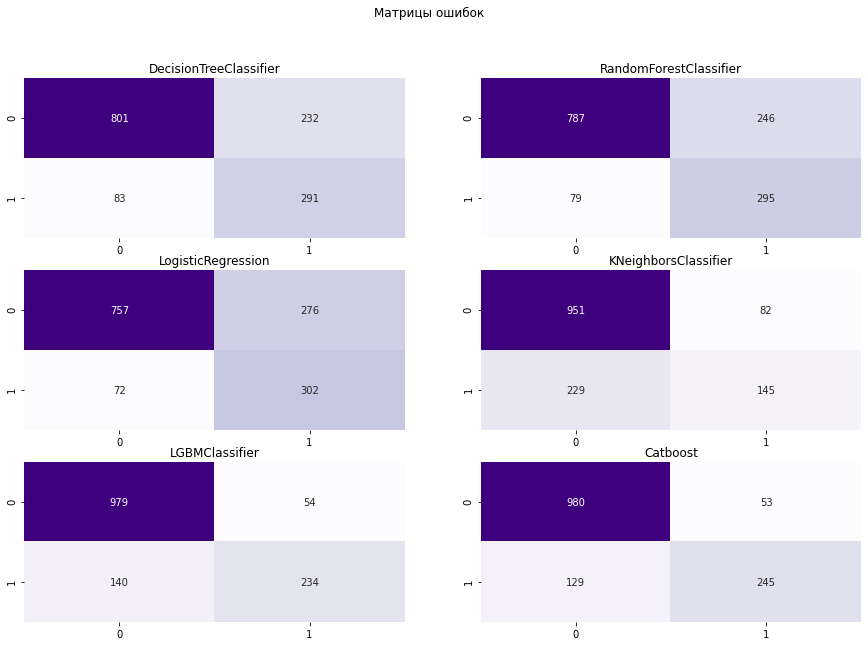

In [51]:
result, model_fitted, predictions = search_of_the_best_classifier(names, classifiers, parameters, X_train, y_train, X_test, y_test)

In [52]:
display(result.sort_values(by = 'auc_roc на тесте', ascending = False))

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
5,0.871,0.822,0.655,0.905,0.913,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
4,0.862,0.812,0.626,0.897,0.911,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 20}"
1,0.769,0.545,0.789,0.849,0.857,RandomForestClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}"
2,0.753,0.522,0.807,0.844,0.853,LogisticRegression,"{'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}"
0,0.776,0.556,0.778,0.855,0.852,DecisionTreeClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}"
3,0.779,0.639,0.388,0.761,0.774,KNeighborsClassifier,{'classifier__n_neighbors': 4}


# Применение библиотеки imblearn для балансировки признаков

In [53]:
oversample = RandomOverSampler(sampling_strategy = 'minority')

In [54]:
print(len(X_train))
print(len(y_train))
print(f"Кол-во признаков до применения метода RandomOverSampler: {Counter(y_train)}")

5625
5625
Кол-во признаков до применения метода RandomOverSampler: Counter({0: 4130, 1: 1495})


In [55]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(len(X_train_over))
print(len(y_train_over))
print(f"Кол-во признаков после применения метода RandomOverSampler: {Counter(y_train_over)}")

8260
8260
Кол-во признаков после применения метода RandomOverSampler: Counter({0: 4130, 1: 4130})


In [56]:
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'LGBMClassifier', 
         'Catboost']

classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), 
               LGBMClassifier(), CatBoostClassifier()]
    
parameters = [{'classifier__max_depth': range (1, 50, 1), 'classifier__min_samples_leaf': range(1, 9, 1), 
              'classifier__min_samples_split': range(1, 7, 1)}, 
              
              {'classifier__n_estimators': range (10, 20, 5), 'classifier__max_depth': range (1, 15, 3), 
               'classifier__min_samples_leaf': range(1, 3, 1), 'classifier__min_samples_split': range(1, 3, 1)}, 
              
              {'classifier__solver': ['liblinear']},
              
              {'classifier__n_neighbors': range (1, 5, 1)},
              
              {'classifier__learning_rate': [0.1],'classifier__max_depth': range(10, 30, 5)},
              
              {'classifier__learning_rate': [0.2, 0,3], 'classifier__iterations': range(100, 200, 50), 
               'classifier__logging_level' : ['Silent']}
              
             ]

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
5,0.845,0.681,0.786,0.956,0.907,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
4,0.842,0.673,0.791,0.952,0.907,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 20}"
1,0.780,0.567,0.722,0.952,0.853,RandomForestClassifier,"{'classifier__max_depth': 13, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}"
2,0.748,0.517,0.805,0.845,0.853,LogisticRegression,{'classifier__solver': 'liblinear'}
0,0.788,0.609,0.567,0.911,0.732,DecisionTreeClassifier,"{'classifier__max_depth': 36, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}"
3,0.741,0.514,0.508,0.871,0.667,KNeighborsClassifier,{'classifier__n_neighbors': 1}


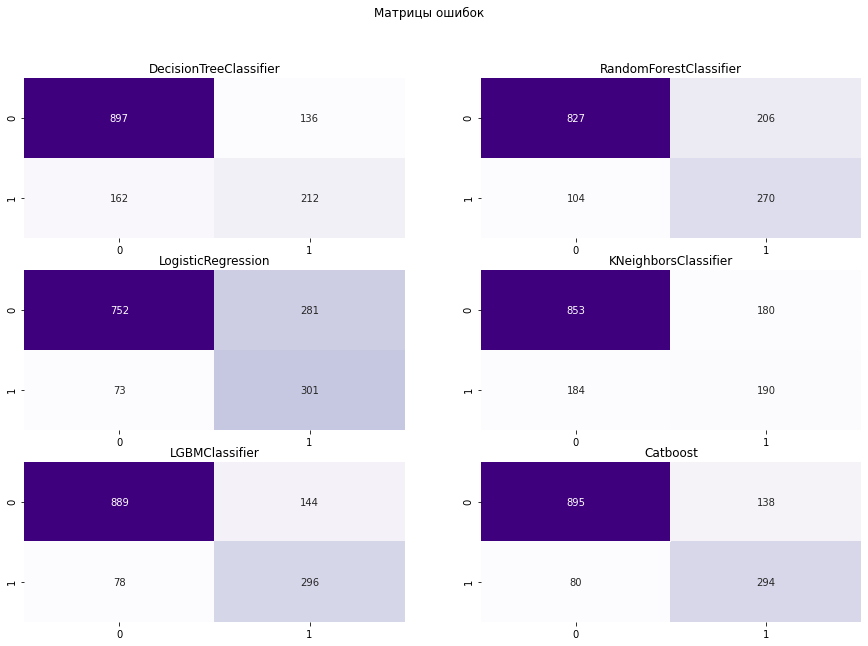

In [57]:
result_with_oversample, model_fitted_wo_class_weight_balanced, predictions = search_of_the_best_classifier(names, 
                    classifiers, parameters, X_train_over, y_train_over, X_test, y_test)

**Таким образом, по отложенной выборке с oversampling метрика auc_roc ниже чем без oversampling.**

# Анализ Feature Importance

По auc_roc на тесте лучше всего сработали 2 модели: Catboost, LGBM. Проведем для CatBoost, LGBM анализ Feature Importance.

In [58]:
def permutation_plot(model_fitted, X, y, length):
    """
    Function takes a fitted_model and calculates feature importance and draw a feature importane plot.
    Entry parameters:
    model_fitted - already fitted model
    X - features train
    y - target test
    length - amount of columns (features)
    Output parameters:
    sorted_idx - sorted indexes for the model according to feature importance
    sorted_idx_for_all_models - sorted indexes for all the models  
    """
    sorted_idx = []
    sorted_idx_for_all_models = []
    
    model_names = ['LGBM', 'Catboost']

    for model_name, model in zip(model_names, model_fitted):

#Оценка важности
        perm = permutation_importance(
        model, X, y, scoring = 'roc_auc', random_state = 123)
#Получаем отсортированные индексы
        sorted_idx = perm.importances_mean.argsort()[-length:]
        sorted_idx_for_all_models.append(sorted_idx)

#График
        plt.figure(figsize=(12, length/2))
        sns.barplot(x=perm.importances_mean[sorted_idx], y=X.columns[sorted_idx], orient='h', color = '#BDB5D5')

#Подписи и вывод
        plt.title('Топ-%s важных признаков, по версии Permutation Importance – метрика %s %s %s' % (length, 
                                                                                        'roc_auc', 'модель', model_name))
        plt.xlabel('Важность признака')
        plt.show()
    return sorted_idx, sorted_idx_for_all_models

Приведенный ниже срез содержит информацию по 2 интересующим нас моделям: LGBMClassifier(), CatBoostClassifier

In [59]:
model_fitted[4:6]

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('cat',
                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                          ['Type',
                                                                           'PaperlessBilling',
                                                                           'PaymentMethod',
                                                                           'InternetService',
                                                                           'OnlineSecurity',
                                                                           'OnlineBackup',
                                                                           'DeviceProtection',
                                                                           'TechSuppo

In [60]:
X_train

,Type,PaperlessBilling,PaymentMethod,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Duration
5327,Two year,No,Mailed check,599.250,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Female,0,Yes,Yes,No,914.000
1194,Month-to-month,No,Electronic check,765.450,DSL,No,Yes,No,No,No,No,Female,0,No,No,No,427.000
4589,Two year,No,Mailed check,220.800,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Female,0,Yes,Yes,No,306.000
3081,Month-to-month,No,Electronic check,299.200,Fiber optic,No,No,No,No,Yes,No,Male,0,No,No,No,123.000
5466,One year,Yes,Bank transfer (automatic),219.500,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Male,0,No,Yes,No,306.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,One year,Yes,Electronic check,"6,989.450",Fiber optic,No,Yes,Yes,No,Yes,Yes,Male,0,Yes,Yes,Yes,"2,041.000"
3842,Month-to-month,No,Credit card (automatic),"2,462.550",Fiber optic,No,No,No,No,Yes,Yes,Female,0,Yes,No,Yes,822.000
5947,Two year,Yes,Mailed check,740.300,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,нет инфо,Female,0,Yes,Yes,Yes,"1,003.000"
2665,One year,Yes,Electronic check,"3,055.500",Fiber optic,Yes,Yes,No,Yes,No,Yes,Male,1,Yes,No,No,"1,006.000"


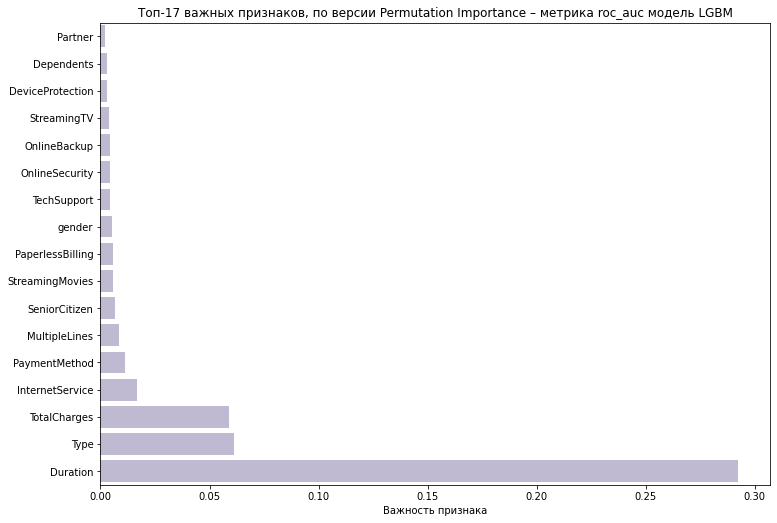

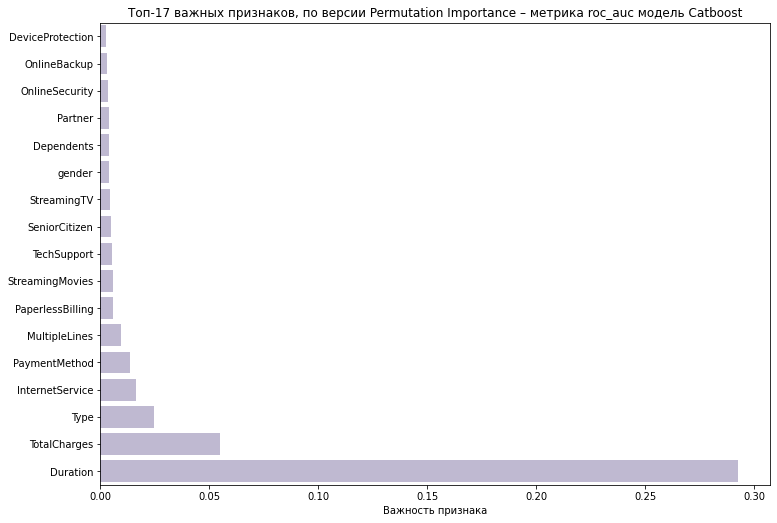

In [61]:
sorted_idx, sorted_idx_for_all_models = permutation_plot(model_fitted[4:6], X_train, y_train, 17)

Как результат мы получили 2 графика по интересующим нас моделям. Дальнейшим шагом будет следующее: оставим для каждой из моделей топ-10 признаков. Остальные удалим. Посчитаем метрики на наших 2 моделях: LGBMClassifier(), CatBoostClassifier только с учетом топ-10 признаков.

Создадим списки с именами моделей, список с моделями, список параметров данных моделей.

In [62]:
names = ['LGBMClassifier', 'Catboost']
classifiers = [LGBMClassifier(), CatBoostClassifier()]
parameters = [{'classifier__learning_rate': [0.1],'classifier__max_depth': range(10, 30, 5)},
              {'classifier__learning_rate': [0.2, 0,3], 'classifier__iterations': range(100, 200, 50),
              'classifier__logging_level' : ['Silent']}
             ]

In [63]:
def search_of_the_best_classifier_with_feature_importance(names, classifiers, parameters, X_train, y_train, 
                                                                                          X_test, y_test):
    """
    Function takes name of a model, a classifier, parameters of classifier and insert it to the GridSearch. Then the 
    function calculates predictions on the test df and draw a confusion matrix for each of a model.
    Entry parameters:
    names - list of the classifier's names
    classifiers - list of the classifiers
    parameters - list of the parametrs of the classifiers, located through a dictionary
    X - slice of a features train with top 10 columns (features) according to feature importance
    y - target test
    X_hold_out - slice of a features target with top 10 columns (features) according to feature importance
    y_hold_out - taerget test
    
    Output parameters:
    result_with_feature_importance - dataframe with best models and best metrics
    """    
    
    predictions = []
    result_with_feature_importance = []

#Списки с интресующими нас срезамим. [7:] - означает, что выбирается топ-10 фитч, согласно feature importance
    X_train_top_10 = [X_train.columns[sorted_idx_for_all_models[0][7:]], X_train.columns[sorted_idx_for_all_models[1][7:]]]
    X_test_top_10 = [X_test.columns[sorted_idx_for_all_models[0][7:]], X_test.columns[sorted_idx_for_all_models[1][7:]]]



    for name, classifier, hyperparam, X_train_dropped, X_test_dropped in zip(names, classifiers, parameters, X_train_top_10, 
                                                                            X_test_top_10):

#Создание среза, списка нумерик, кат фичей. Создание препроцессора
        numeric_features = ['TotalCharges', 'Duration']
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        cat_features = X_train_dropped.tolist()
        categorical_transformer = OneHotEncoder(handle_unknown='ignore')
        preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, cat_features),
                                               ('num', numeric_transformer, numeric_features) 
                                                                                              ])
#Обучение модели через гридсерч   
        clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
        model = GridSearchCV(clf, param_grid = hyperparam, cv=5, scoring='roc_auc', n_jobs = -1, verbose = 0).fit(
            X_train[X_train_dropped], y_train)

        auc_roc_valid = model.best_score_
    
    
        model_fitted.append(model)
#Расчет метрик

        predicted_test = model.best_estimator_.predict(X_test[X_test_dropped])
        probabilities_test = model.best_estimator_.predict_proba(X_test[X_test_dropped])
        probabilities_one_test = probabilities_test[:, 1]
        auc_roc = roc_auc_score(y_test, probabilities_one_test)
        accuracy = accuracy_score(y_test, predicted_test)
        precision = precision_score(y_test, predicted_test)
        recall = recall_score(y_test, predicted_test)
    
#Сохранение результатов    
        result_with_feature_importance.append([accuracy, precision, recall, auc_roc_valid, auc_roc, name, model.best_params_])
        predictions.append(predicted_test)
    result_with_feature_importance = pd.DataFrame(result_with_feature_importance, 
                                          columns = ['accuracy', 'precision', 'recall', 'auc_roc на валиде', 
                                                     'auc_roc на тесте', 'Название модели', 
                                         'Оптимальные параметры модель']) 

#Отрисвока графиков
    fig, axes = plt.subplots(1, 2, figsize=(15, 3.5))
    sns.heatmap(confusion_matrix(y_test, predictions[0]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[0]).set(title='LGBMClassifier')
    sns.heatmap(confusion_matrix(y_test, predictions[1]), annot=True, fmt='d',cmap="Purples",cbar=False, 
                ax = axes[1]).set(title='Catboost')
    fig.suptitle('Матрицы ошибок')
    
    display(result_with_feature_importance.sort_values(by = 'auc_roc на тесте', ascending = False))
    
    return result_with_feature_importance


,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
1,0.892,0.880,0.687,0.937,0.941,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
0,0.894,0.857,0.722,0.937,0.937,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 25}"


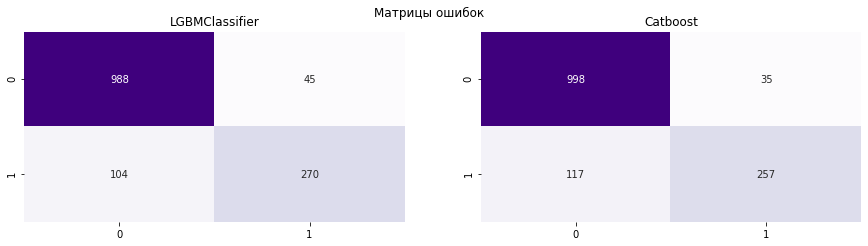

In [64]:
result_with_feature_importance = search_of_the_best_classifier_with_feature_importance(names, classifiers, parameters, X_train, y_train, 
                                                                                          X_test, y_test)

# Нейронная сеть 

In [65]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndDate           7032 non-null   int64  
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   TotalCharges      7032 non-null   float64
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  gender            7032 non-null   object 
 13  SeniorCitizen     7032 non-null   object 
 14  Partner           7032 non-null   object 
 15  Dependents        7032 non-null   object 
 16  MultipleLines     7032 non-null   object 


In [66]:
cols_to_drop = []
df_all['SeniorCitizen'] = df_all['SeniorCitizen'].astype('int64')
df_all['EndDate'] = df_all['EndDate'].astype('int64')
categorical_features = df_all.drop(['EndDate'], axis=1).select_dtypes(include='object').columns
numeric_features = df_all.drop(['EndDate'], axis=1).select_dtypes(include=['float64','int64']).columns

In [67]:
df_keras = df_all.copy()
df_keras = df_keras.rename(columns={"EndDate": "target"})

In [68]:
train, test = train_test_split(df_keras, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [69]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [70]:
train_ds = df_to_dataset(train)

In [71]:
def get_normalization_layer(name, dataset):
    # делем слой для нормализации
    normalizer = preprocessing.Normalization(axis=None)
    # берем только одну нашу фичу из датасета
    feature_ds = dataset.map(lambda x, y: x[name])
    # учимся
    normalizer.adapt(feature_ds)
    return normalizer

In [72]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    # обрабатываем строки
    if dtype == 'string':
        index = preprocessing.StringLookup(max_tokens=max_tokens)
    else:
        index = preprocessing.IntegerLookup(max_tokens=max_tokens)
    # берем только одну нашу фичу из датасета
    feature_ds = dataset.map(lambda x, y: x[name])
    index.adapt(feature_ds)
    encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())
    #применяем OneHotEncoding
    return lambda feature: encoder(index(feature))

In [73]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [74]:
all_inputs = []
encoded_features = []
for header in numeric_features:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [75]:
for header in categorical_features:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    encoding_layer = get_category_encoding_layer(header, train_ds, dtype='string',
                                               max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

In [76]:
optimizer = Adam(learning_rate=0.0009)
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(17, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(curve='ROC'),'accuracy'])

In [77]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Type (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
PaperlessBilling (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
PaymentMethod (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
InternetService (InputLayer)    [(None, 1)]          0                                            
______________________________________________________________________________________________

In [78]:
history = model.fit(train_ds, epochs=500, validation_data=val_ds, verbose=2, shuffle=True)

Epoch 1/500
18/18 - 5s - loss: 0.7168 - auc: 0.4712 - accuracy: 0.4931 - val_loss: 0.6648 - val_auc: 0.4514 - val_accuracy: 0.5867
Epoch 2/500
18/18 - 0s - loss: 0.6503 - auc: 0.5078 - accuracy: 0.6422 - val_loss: 0.6110 - val_auc: 0.5532 - val_accuracy: 0.7156
Epoch 3/500
18/18 - 0s - loss: 0.6002 - auc: 0.5887 - accuracy: 0.7084 - val_loss: 0.5694 - val_auc: 0.6657 - val_accuracy: 0.7333
Epoch 4/500
18/18 - 0s - loss: 0.5684 - auc: 0.6416 - accuracy: 0.7289 - val_loss: 0.5351 - val_auc: 0.7432 - val_accuracy: 0.7387
Epoch 5/500
18/18 - 0s - loss: 0.5410 - auc: 0.6976 - accuracy: 0.7384 - val_loss: 0.5087 - val_auc: 0.7843 - val_accuracy: 0.7582
Epoch 6/500
18/18 - 0s - loss: 0.5208 - auc: 0.7255 - accuracy: 0.7484 - val_loss: 0.4889 - val_auc: 0.8040 - val_accuracy: 0.7716
Epoch 7/500
18/18 - 0s - loss: 0.5024 - auc: 0.7519 - accuracy: 0.7513 - val_loss: 0.4735 - val_auc: 0.8158 - val_accuracy: 0.7751
Epoch 8/500
18/18 - 0s - loss: 0.4978 - auc: 0.7597 - accuracy: 0.7587 - val_loss: 

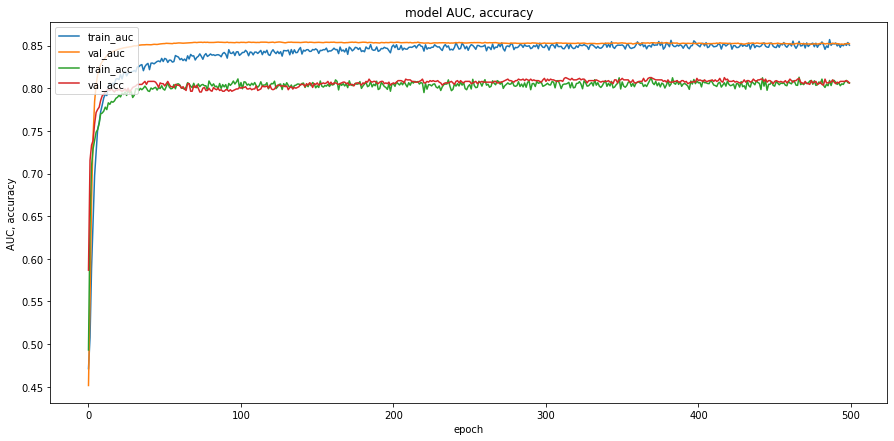

In [79]:
plt.figure(figsize=(15, 7))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model AUC, accuracy')
plt.ylabel('AUC, accuracy')
plt.xlabel('epoch')
plt.legend(['train_auc','val_auc', 'train_acc','val_acc'], loc='upper left')
plt.show()

In [80]:
train_acc = model.evaluate(train_ds, verbose=2)
test_acc = model.evaluate(test_ds, verbose=2)

18/18 - 0s - loss: 0.3939 - auc: 0.8669 - accuracy: 0.8184
6/6 - 0s - loss: 0.4152 - auc: 0.8392 - accuracy: 0.7939


In [81]:
print('Train AUC-ROC: %.3f, Test AUC-ROC: %.3f' % (train_acc[1], test_acc[1]))

Train AUC-ROC: 0.867, Test AUC-ROC: 0.839


In [82]:
y_pred_proba = model.predict(test_ds)

In [83]:
threshold = 0.4
y_pred = y_pred_proba.copy()
y_pred[y_pred <= threshold] = 0
y_pred[y_pred > threshold] = 1

In [84]:
y_test = test['target']

In [85]:
roc_auc = roc_auc_score(y_test,  y_pred_proba)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = precision_score(y_test, y_pred)

In [86]:
table_result_keras = []
table_result_keras.append([roc_auc, acc, precision, recall])

In [87]:
table_result_keras

[[0.8393682833429553,
  0.7924662402274343,
  0.5966386554621849,
  0.5966386554621849]]

In [88]:
table_result_keras = pd.DataFrame(table_result_keras, 
                                          columns = ['auc_roc', 'accuracy', 'precision', 'recall']) 
display(table_result_keras)

,auc_roc,accuracy,precision,recall
0,0.839,0.792,0.597,0.597


# Вывод

В данной работе были построены модели предсказаний оттоков клиентов. Данная задача выполнена в три этапа:  
1) Обучение моделей через гридсерч.  
2) Обучение моделей после балансировки признаков.  
3) Обучение лучших моделей на основе пункта 1) с учетом feature importance.  
Рузультаты приведены ниже в последовательности 1), 2), 3):  

In [89]:
display(result.sort_values(by = 'auc_roc на тесте', ascending = False))

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
5,0.871,0.822,0.655,0.905,0.913,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
4,0.862,0.812,0.626,0.897,0.911,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 20}"
1,0.769,0.545,0.789,0.849,0.857,RandomForestClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}"
2,0.753,0.522,0.807,0.844,0.853,LogisticRegression,"{'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}"
0,0.776,0.556,0.778,0.855,0.852,DecisionTreeClassifier,"{'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}"
3,0.779,0.639,0.388,0.761,0.774,KNeighborsClassifier,{'classifier__n_neighbors': 4}


In [90]:
display(result_with_oversample.sort_values(by = 'auc_roc на тесте', ascending = False))

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
5,0.845,0.681,0.786,0.956,0.907,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
4,0.842,0.673,0.791,0.952,0.907,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 20}"
1,0.780,0.567,0.722,0.952,0.853,RandomForestClassifier,"{'classifier__max_depth': 13, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}"
2,0.748,0.517,0.805,0.845,0.853,LogisticRegression,{'classifier__solver': 'liblinear'}
0,0.788,0.609,0.567,0.911,0.732,DecisionTreeClassifier,"{'classifier__max_depth': 36, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}"
3,0.741,0.514,0.508,0.871,0.667,KNeighborsClassifier,{'classifier__n_neighbors': 1}


In [91]:
display(result_with_feature_importance.sort_values(by = 'auc_roc на тесте', ascending = False))

,accuracy,precision,recall,auc_roc на валиде,auc_roc на тесте,Название модели,Оптимальные параметры модель
1,0.892,0.880,0.687,0.937,0.941,Catboost,"{'classifier__iterations': 150, 'classifier__learning_rate': 0.2, 'classifier__logging_level': 'Silent'}"
0,0.894,0.857,0.722,0.937,0.937,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 25}"


Согласно поставленной задачи, ключевыми метриками являются ROC-AUC, Accuracy. Лучшие метрики получены на моделях градиентного бустинга Catboost, LGBMClassifier. Видно, что из всех опробованных моделей "победил" CatBoost со значением <b>ROC-AUC=0.941</b> на тестовой выборке.   
  У модели catboost есть несколько отрицательных факторов: долгое время подбора гиперпараметров. В случае необходимсоти для бизнеса работать с более быстрой моделью и в случае ограничения цифровых мощностей можно предложить модель LGBMClassifier, которая так же является моделью градиентного бустинга на деревьях. Метрика на LGBMClassifier незначительно уступает метрики на CatBoost и состовляет <b>ROC-AUC=0.937</b>.

Если рассамтривать использования нейронных сетей для бинарной классификации на табличных данных, то тут явно своеобразный "оверкилл", т.к. метрика еле вытягивает (или даже не вытягивает) выше логистической регрессии, а сложность построения и обучения выше чем у "классических" моделей.

Также в данном проекте мы рассмотрели возможность анализа признаков, которые больше всего влияют на результат предсказания. Для этого использовали метод permature importance библиотеки sklearn. Как результат, можно взять ТОП 10 признаков и представить бизнесу, как требующие особого внимания. Для обоих моделей ТОП 3 признаками являются Duration, Type, Total Charges. ТОП 1 является Duration. Такис образом ТОП 3 фактора, которые наиболее вляют на то, что пользователь может уйти от нас:  
  1) Duration - продолжительность срока работы клиента с нами.  
  2) Total Charges - суммарная выручка с клиента или сколько он заплатил за весь срок работы с нами.  
  3) Type - тип контракта.  
Так же, для моделей LGBM, Catboost Classifier были рассчитаны метрики только с ТОП-10 признаками. Как результат мы получили рост метрик ROC-AUC.

Не следует забывать, что при указании целевой метрики AUC-ROC нужно анализировать ряд других отдельных показателей в зависимости от конкретной задачи. Главная проблема метрики AUC-ROC, accuracy, что они сложно интерпритируемы с точки зрения бизнеса. Дополнительные метрики, которые необходимо использовать:  

- prescision (точность) показывает количество истинно положительных исходов из всего набора положительных меток. Важность этой метрики определяется тем, насколько высока для рассматриваемой задачи «цена» ложно положительного результата
- recall (полнота) определяет количество истинно положительных среди всех меток класса, которые были определены как «положительный». Необходимо уделить особое внимание этой оценке, когда в поставленной задаче ошибка нераспознания положительного класса высока.  
Для оценки данных метрик предалашаем использовать матрицу ошибок. Для случая номер 3: Обучение лучших моделей на основе пункта с учетом feature importance значения по главной диагонали матрицы ошибок максимальны.  

Так же на основании статистического теста и предоставленных данных, можно сделать вывод, что средние значению выручки по клиентам, которые остались не равно среднему значению выручки по клиентам, которые ушли. **Для бизнеса можно сделать негативный вывод, что более богатые клиенты уходят от нас.**